In [1]:
import numpy as np
import pandas as pd

In [2]:
# read in X and Y dataframes
X = pd.read_csv('X.csv',index_col=0)
Y = pd.read_csv('Y.csv',index_col=0)

In [3]:
X.head()

,2315633,2315739,2316245,2317434,2317512,2318086,2318257,2318455,2318656,2319252,...,4049862,4051723,4053085,4054204,4054414,4054427,4054437,4054639,4055661,7385641
GSM547265,6.63426,6.61106,8.11258,8.16793,6.20079,6.63915,6.89326,5.62877,6.09928,6.47993,...,8.18693,6.86065,5.94963,7.10436,5.75385,6.05586,6.01827,8.13807,9.58889,5.29320
GSM547266,6.77339,6.92113,8.32914,8.51536,6.22947,6.76890,7.32080,4.75461,6.23427,6.76784,...,8.00690,7.22674,6.19202,7.25671,5.08699,5.06429,5.19170,7.83636,10.68940,5.60921
GSM547267,6.82841,6.89531,7.93158,8.02643,6.74113,7.00569,6.87472,4.72446,5.87781,6.50739,...,7.64298,7.30349,6.51488,6.79476,5.62140,5.33508,6.24613,8.30760,9.83950,5.93616
GSM547268,6.12285,6.44312,7.95581,8.58608,6.15481,7.17477,6.65657,4.61109,6.40874,6.65112,...,7.45939,7.31671,6.77977,8.21227,4.49934,5.16386,4.57206,8.05844,10.98220,5.47754
GSM547269,6.63802,6.33454,8.12448,8.52964,5.89551,6.25038,6.35403,5.08841,6.89595,6.24782,...,8.02464,6.65667,5.40819,6.92056,5.54521,5.56643,5.62098,8.12339,10.31470,4.85305


In [4]:
Y.head()

,status
0,0
1,1
2,0
3,1
4,0


In [5]:
# Retain only the Genes who probe IDs matches with the probe IDs of the biomarkers we found
# The probe ids of the biomarkers are 3237280, 3332424, 3791782

# list of biomarker probe ids
biomarker_probe_ids = ['3237280', '3332424', '3791782']

# get list of columns to drop
columns_to_drop = list(set(X.columns) - set(biomarker_probe_ids))

In [7]:
# drop columns that are not present in biomarker_probe_ids
X = X.drop(columns=columns_to_drop)

In [8]:
X.head()

,3237280,3332424,3791782
GSM547265,3.41076,4.81640,6.26247
GSM547266,4.41469,9.00328,3.74478
GSM547267,3.95550,6.75855,5.16083
GSM547268,6.73846,9.14629,3.61572
GSM547269,4.13277,6.11850,7.42879


In [9]:
#Convert the dataframes to matries
X = X.values
Y = Y.values.ravel()

## Testing the accuracy using the Random Forests Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross validation and get accuracy scores
scores = cross_val_score(rf, X, Y, cv=10)

# Print the mean accuracy and standard deviation
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


Accuracy: 0.98 (+/- 0.08)


## Testing the accuracy using the K-Nearest Neighbour as classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

# Define the KNN classifier
clf = KNeighborsClassifier()

# Define the k-fold cross-validation object
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(clf, X, Y, cv=kfold)

# Calculate the mean and standard deviation of the scores
mean_score = scores.mean()
std_score = scores.std()

# Print the results
print(f"Accuracy: {mean_score} +/- {2*std_score}")


Accuracy: 0.9777777777777779 +/- 0.08888888888888893


C:\Users\msata\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\msata\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

## Testing the accuracy using the Artificial Neural Network as classifier

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Load the data
X = pd.read_csv('X.csv', index_col=0)
y = pd.read_csv('Y.csv', index_col=0)

# Define the k-fold cross-validation iterator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the ANN classifier
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Initialize a list to store the cross-validation scores
scores = []

# Iterate through each fold
for train_idx, test_idx in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Scale the data using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit the classifier to the training data and predict on the testing data
    clf.fit(X_train_scaled, y_train.values.ravel())
    y_pred = clf.predict(X_test_scaled)

    # Calculate the accuracy and add it to the list of scores
    accuracy = clf.score(X_test_scaled, y_test)
    scores.append(accuracy)

# Print the average accuracy across all folds
print('Average Accuracy:', np.mean(scores))


Average Accuracy: 0.9777777777777779


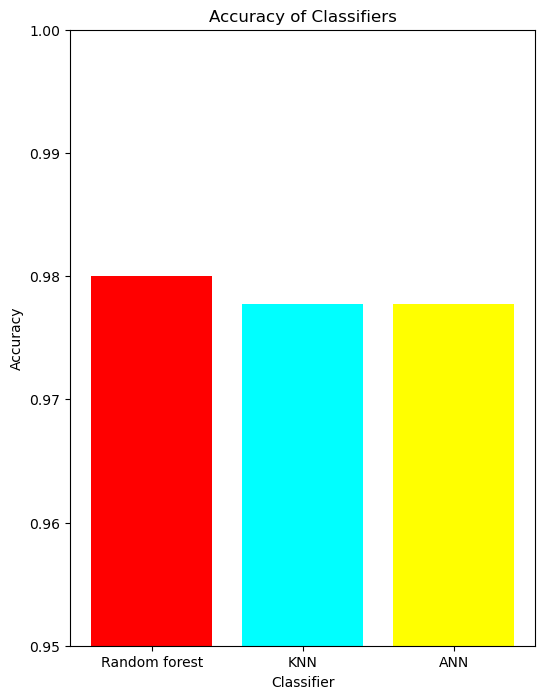

In [36]:
import matplotlib.pyplot as plt

# Define the accuracies for each model
accuracies = [0.98, 0.9777777777777779, 0.9777777777777779]

# Define the labels for each model
labels = ['Random forest', 'KNN', 'ANN']

# Set the figure size and create a bar plot
plt.figure(figsize=(6,8))
plt.bar(labels, accuracies, color=['red', 'cyan', 'yellow'])

# Add labels to the x-axis, y-axis, and title
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classifiers')

# Increase the height of the plot
plt.ylim([0.95, 1.0])

# Display the plot
plt.show()
